In [2]:
# 📌 Set up environment
import sys
import os

# Set working directory to project root
project_root = os.path.abspath(os.path.join(os.path.dirname("__file__"), ".."))
sys.path.append(project_root)
print(f"📌 Project root added to Python path: {project_root}")

# Disable TensorFlow oneDNN optimizations
os.environ["TF_ENABLE_ONEDNN_OPTS"] = "0"

📌 Project root added to Python path: f:\Portfolio Projects\fault_prediction_project


In [3]:
# 📌 Import libraries
import mlflow
import mlflow.sklearn
import mlflow.keras
import joblib
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# ✅ Set MLflow tracking
mlflow.set_tracking_uri("file:F:/Portfolio Projects/fault_prediction_project/mlruns")

# ✅ Load Data Processor
from src.data_processor import DataProcessor


Updated working directory: F:\Portfolio Projects\fault_prediction_project


In [4]:
# -----------------------------------
# 📂 **Retrieve Experiment Results**
# -----------------------------------
experiment_name = "NEV Fault Prediction"
client = mlflow.tracking.MlflowClient()
experiment = client.get_experiment_by_name(experiment_name)

if experiment:
    experiment_id = experiment.experiment_id
    print(f"🔍 Experiment Found: {experiment_name} (ID: {experiment_id})")

    # ✅ Retrieve All Runs
    runs = mlflow.search_runs(experiment_ids=[experiment_id])
    display(runs)
    
    # ✅ Extract Accuracy & F1 Scores
    runs_sorted = runs.sort_values(by=["metrics.Accuracy"], ascending=False)
    best_run = runs_sorted.iloc[0]  # Best Model (Highest Accuracy)
    
    print("\n🏆 **Best Model Summary**")
    print(f"🔹 Run ID: {best_run['run_id']}")
    print(f"🔹 Model Type: {best_run['params.Model']}")
    print(f"🔹 Accuracy: {best_run['metrics.Accuracy']:.4f}")
    print(f"🔹 F1 Score: {best_run['metrics.F1 Score']:.4f}")

else:
    print(f"❌ Experiment '{experiment_name}' not found in MLflow.")
    raise ValueError("Experiment not found. Ensure training was completed successfully.")


🔍 Experiment Found: NEV Fault Prediction (ID: 560277888509444402)


,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.Accuracy,metrics.F1 Score,params.Batch Size,params.Learning Rate,params.Model,params.n_estimators,params.max_depth,tags.mlflow.source.type,tags.mlflow.runName,tags.mlflow.log-model.history,tags.mlflow.user,tags.mlflow.source.name
0,301612f2d23b4dd6be34094a773e40a3,560277888509444402,FINISHED,file:///F:/Portfolio%20Projects/fault_predicti...,2025-01-29 22:12:16.253000+00:00,2025-01-29 22:13:28.659000+00:00,0.610429,0.600840,32,0.001,Deep Learning,None,None,LOCAL,Deep Learning Model,"[{""run_id"": ""301612f2d23b4dd6be34094a773e40a3""...",niloy,C:\Users\niloy\AppData\Roaming\Python\Python31...
1,8b0006486cdc4a1596e6a95559d26ba7,560277888509444402,FINISHED,file:///F:/Portfolio%20Projects/fault_predicti...,2025-01-29 22:09:50.588000+00:00,2025-01-29 22:10:03.545000+00:00,0.656442,0.661774,None,None,Random Forest,100,None,LOCAL,Random Forest Classifier,"[{""run_id"": ""8b0006486cdc4a1596e6a95559d26ba7""...",niloy,C:\Users\niloy\AppData\Roaming\Python\Python31...
2,c59e37b3694648ce9e0cdcdae82886e8,560277888509444402,FINISHED,file:///F:/Portfolio%20Projects/fault_predicti...,2025-01-29 22:03:43.515000+00:00,2025-01-29 22:03:55.310000+00:00,0.355000,0.217926,None,None,Random Forest,200,15,LOCAL,Optimized Random Forest Classifier,"[{""run_id"": ""c59e37b3694648ce9e0cdcdae82886e8""...",niloy,C:\Users\niloy\AppData\Roaming\Python\Python31...
3,aadbfe0c4ca24ad2b9a306d0d639a7d6,560277888509444402,FINISHED,file:///F:/Portfolio%20Projects/fault_predicti...,2025-01-29 21:57:57.589000+00:00,2025-01-29 21:58:09.113000+00:00,0.350000,0.245128,None,None,Random Forest,200,15,LOCAL,Optimized Random Forest Classifier,"[{""run_id"": ""aadbfe0c4ca24ad2b9a306d0d639a7d6""...",niloy,C:\Users\niloy\AppData\Roaming\Python\Python31...
4,7c5afddbac444c7b9edc217df19626bf,560277888509444402,FINISHED,file:///F:/Portfolio%20Projects/fault_predicti...,2025-01-29 21:50:58.397000+00:00,2025-01-29 21:51:28.867000+00:00,0.380000,0.275268,None,None,Random Forest,200,15,LOCAL,Optimized Random Forest Classifier,"[{""run_id"": ""7c5afddbac444c7b9edc217df19626bf""...",niloy,C:\Users\niloy\AppData\Roaming\Python\Python31...
5,3b27ae0a27d845f6ac2852c5b9d6717f,560277888509444402,FINISHED,file:///F:/Portfolio%20Projects/fault_predicti...,2025-01-29 17:19:20.062000+00:00,2025-01-29 17:19:56.115000+00:00,0.604294,0.598814,32,0.001,Deep Learning,None,None,LOCAL,Deep Learning Model,"[{""run_id"": ""3b27ae0a27d845f6ac2852c5b9d6717f""...",niloy,f:/Portfolio Projects/fault_prediction_project...
6,236b744f4fc34cf8ac95b55e8a1fd5ad,560277888509444402,FINISHED,file:///F:/Portfolio%20Projects/fault_predicti...,2025-01-29 17:19:07.719000+00:00,2025-01-29 17:19:20.028000+00:00,0.656442,0.661774,None,None,Random Forest,100,None,LOCAL,Random Forest Classifier,"[{""run_id"": ""236b744f4fc34cf8ac95b55e8a1fd5ad""...",niloy,f:/Portfolio Projects/fault_prediction_project...
7,1008cde0d46e4229984a8c245250eea4,560277888509444402,FINISHED,file:///F:/Portfolio%20Projects/fault_predicti...,2025-01-29 16:15:43.017000+00:00,2025-01-29 16:15:53.557000+00:00,NaN,NaN,None,None,None,None,None,LOCAL,Register Best Model,"[{""run_id"": ""1008cde0d46e4229984a8c245250eea4""...",niloy,C:\Users\niloy\AppData\Roaming\Python\Python31...
8,cdb416c2448d4827905b64f9943beae9,560277888509444402,FINISHED,file:///F:/Portfolio%20Projects/fault_predicti...,2025-01-29 15:34:32.719000+00:00,2025-01-29 15:35:02.095000+00:00,NaN,NaN,None,None,None,None,None,LOCAL,delicate-mouse-865,"[{""run_id"": ""cdb416c2448d4827905b64f9943beae9""...",niloy,C:\Users\niloy\AppData\Roaming\Python\Python31...
9,b693c7cfd5244c8ebb2cb2f9f09761fc,560277888509444402,FINISHED,file:///F:/Portfolio%20Projects/fault_predicti...,2025-01-29 15:16:55.935000+00:00,2025-01-29 15:18:29.929000+00:00,0.598159,0.591629,32,0.001,Deep Learning,None,None,LOCAL,Deep Learning Model,"[{""run_id"": ""b693c7cfd5244c8ebb2cb2f9f09761fc""...",niloy,C:\Users\niloy\AppData\Roaming\Python\Python31...



🏆 **Best Model Summary**
🔹 Run ID: 8b0006486cdc4a1596e6a95559d26ba7
🔹 Model Type: Random Forest
🔹 Accuracy: 0.6564
🔹 F1 Score: 0.6618


In [6]:
print(runs[["params.Model", "metrics.Accuracy"]].head())


    params.Model  metrics.Accuracy
0  Deep Learning          0.610429
1  Random Forest          0.656442
2  Random Forest          0.355000
3  Random Forest          0.350000
4  Random Forest          0.380000



📊 **Plotting Model Performance Metrics**


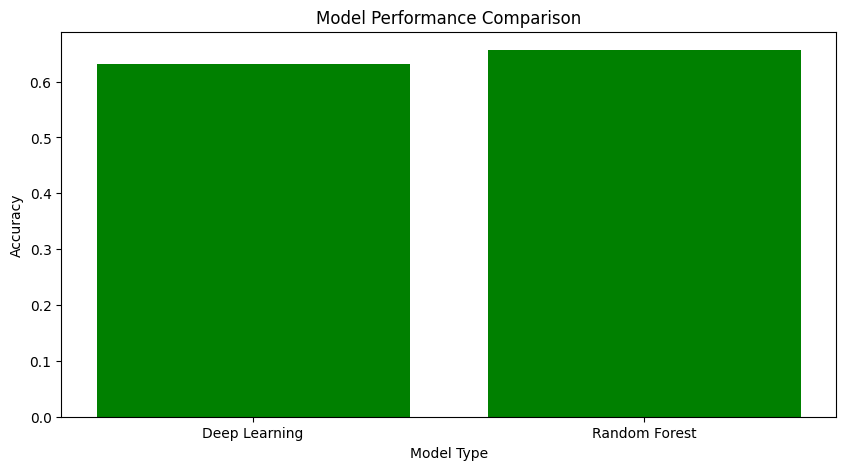

In [7]:
# -----------------------------------
# 📊 **Visualizing Model Performance**
# -----------------------------------
print("\n📊 **Plotting Model Performance Metrics**")

plt.figure(figsize=(10, 5))

# Drop rows where Model or Accuracy is missing
runs_cleaned = runs.dropna(subset=["params.Model", "metrics.Accuracy"])

plt.bar(runs_cleaned["params.Model"], runs_cleaned["metrics.Accuracy"], color=["blue", "green"])
plt.xlabel("Model Type")
plt.ylabel("Accuracy")
plt.title("Model Performance Comparison")
plt.show()


In [8]:
# -----------------------------------
# 🚀 **Load the Best Model**
# -----------------------------------
print("\n🚀 Loading the Best Model from MLflow...")

best_model_name = best_run["params.Model"]
best_run_id = best_run["run_id"]

if best_model_name == "Random Forest":
    model_uri = f"runs:/{best_run_id}/random_forest_model"
    best_model = mlflow.sklearn.load_model(model_uri)
    model_type = "sklearn"
elif best_model_name == "Deep Learning":
    model_uri = f"runs:/{best_run_id}/deep_learning_model"
    best_model = mlflow.keras.load_model(model_uri)
    model_type = "keras"
else:
    print(f"❌ Unsupported model type: {best_model_name}")
    raise ValueError("Invalid model type.")

print(f"✅ Best Model Loaded: {best_model_name} (Run ID: {best_run_id})")


🚀 Loading the Best Model from MLflow...
✅ Best Model Loaded: Random Forest (Run ID: 8b0006486cdc4a1596e6a95559d26ba7)


In [12]:
# -----------------------------------
# 🛠️ **Load Test Data**
# -----------------------------------
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

print("\n📂 Loading Test Data for Model Evaluation...")
data_file_path = "F:/Portfolio Projects/fault_prediction_project/data/Fault_nev_dataset.csv"
processor = DataProcessor(data_file_path)

# Load & preprocess test data
data = processor.load_data()
X, y = processor.preprocess(target_column="fault_type", categorical_columns=["road_condition"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Encode labels for Deep Learning models
if model_type == "keras":
    label_encoder = LabelEncoder()
    y_test_encoded = label_encoder.fit_transform(y_test)
    y_test_onehot = tf.keras.utils.to_categorical(y_test_encoded, num_classes=len(label_encoder.classes_))

# -----------------------------------
# 📌 **Evaluate Model Performance**
# -----------------------------------
print("\n📊 **Evaluating Best Model on Test Data**")

if model_type == "sklearn":
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")

elif model_type == "keras":
    y_pred_probs = best_model.predict(X_test)
    y_pred = np.argmax(y_pred_probs, axis=1)
    accuracy = accuracy_score(y_test_encoded, y_pred)
    f1 = f1_score(y_test_encoded, y_pred, average="weighted")

print(f"🏆 Final Model Performance on Test Data")
print(f"🎯 Accuracy: {accuracy:.4f}")
print(f"🎯 F1 Score: {f1:.4f}")



📂 Loading Test Data for Model Evaluation...

📊 **Evaluating Best Model on Test Data**
🏆 Final Model Performance on Test Data
🎯 Accuracy: 0.6564
🎯 F1 Score: 0.6618


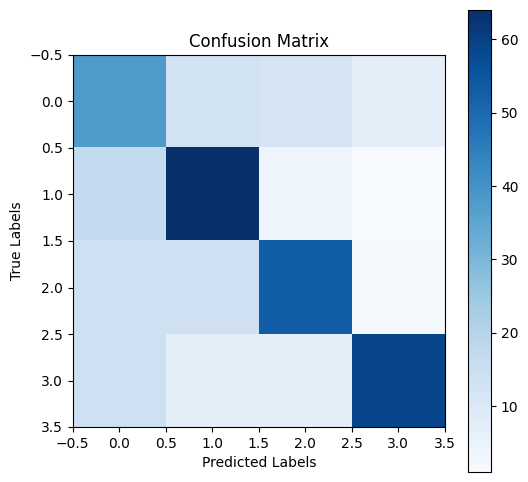

In [13]:
# ✅ **Confusion Matrix**
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
plt.imshow(cm, cmap="Blues", interpolation="nearest")
plt.colorbar()
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


In [14]:
# ✅ **Classification Report**
print("\n📜 **Classification Report**")
print(classification_report(y_test, y_pred))



📜 **Classification Report**
                    precision    recall  f1-score   support

     battery_issue       0.46      0.54      0.50        70
engine_overheating       0.65      0.74      0.70        86
          no_fault       0.70      0.64      0.67        83
sensor_malfunction       0.86      0.68      0.76        87

          accuracy                           0.66       326
         macro avg       0.67      0.65      0.65       326
      weighted avg       0.68      0.66      0.66       326



In [17]:
import os
import pandas as pd

# ✅ Define the path
reports_dir = "F:/Portfolio Projects/fault_prediction_project/reports"
results_file_path = os.path.join(reports_dir, "final_model_results.csv")

# ✅ Ensure the directory exists before saving the file
os.makedirs(reports_dir, exist_ok=True)  # ✅ FIX: Create directory if it does not exist

# ✅ Save results
results_df = pd.DataFrame({"Model": [best_model_name], "Accuracy": [accuracy], "F1 Score": [f1]})
results_df.to_csv(results_file_path, index=False)
print(f"✅ Results saved at: {results_file_path}")

print("\n🎯 **Results Summary Completed!** ✅")


✅ Results saved at: F:/Portfolio Projects/fault_prediction_project/reports\final_model_results.csv

🎯 **Results Summary Completed!** ✅


C:\Users\niloy\AppData\Local\Temp\ipykernel_21704\4196122150.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=rf_importance_df.head(10), ax=axes[0], palette="Blues_r")
C:\Users\niloy\AppData\Local\Temp\ipykernel_21704\4196122150.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=dl_importance_df.head(10), ax=axes[1], palette="Greens_r")


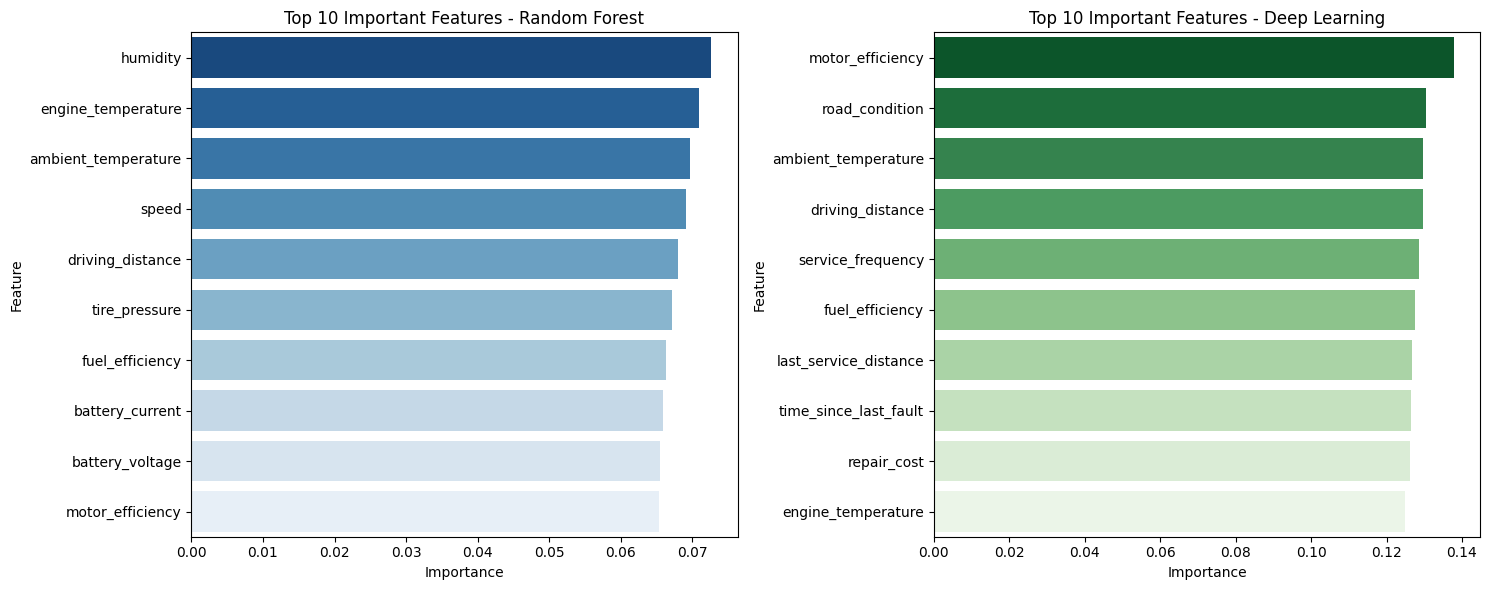

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import tensorflow as tf

# ✅ Load Test Data
data_file_path = "F:/Portfolio Projects/fault_prediction_project/data/Fault_nev_dataset.csv"
processor = DataProcessor(data_file_path)
data = processor.load_data()
X, y = processor.preprocess(target_column="fault_type", categorical_columns=["road_condition"])
feature_names = X.columns

# ✅ Load Best Models
rf_model_path = "F:/Portfolio Projects/fault_prediction_project/models/best_rf_model.pkl"
nn_model_path = "F:/Portfolio Projects/fault_prediction_project/models/deep_learning_model.keras"

rf_model = joblib.load(rf_model_path)  # Load Random Forest model
nn_model = tf.keras.models.load_model(nn_model_path)  # Load Deep Learning model

# ---------------------------------------------
# 🌲 **Feature Importance - Random Forest**
# ---------------------------------------------
rf_importance = rf_model.feature_importances_
rf_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": rf_importance})
rf_importance_df = rf_importance_df.sort_values(by="Importance", ascending=False)

# ---------------------------------------------
# 🤖 **Feature Importance - Deep Learning**
# ---------------------------------------------
# Extract first layer weights
first_layer_weights = nn_model.layers[0].get_weights()[0]  # Shape: (num_features, num_neurons)
dl_importance = np.mean(np.abs(first_layer_weights), axis=1)  # Compute mean absolute weight per feature

dl_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": dl_importance})
dl_importance_df = dl_importance_df.sort_values(by="Importance", ascending=False)

# ---------------------------------------------
# 📊 **Plot Feature Importance - Side by Side**
# ---------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 🌲 Random Forest Plot
sns.barplot(x="Importance", y="Feature", data=rf_importance_df.head(10), ax=axes[0], palette="Blues_r")
axes[0].set_title("Top 10 Important Features - Random Forest")

# 🤖 Deep Learning Plot
sns.barplot(x="Importance", y="Feature", data=dl_importance_df.head(10), ax=axes[1], palette="Greens_r")
axes[1].set_title("Top 10 Important Features - Deep Learning")

plt.tight_layout()
plt.show()
